<a href="https://colab.research.google.com/github/gmortuza/machine-learning/blob/master/models/regression/linear_regression/Linear%20regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import the required module
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import r2_score

In [2]:
def propagate(w, b, x, y):
    m = x.shape[0]
    # Calculating cost
    h_x = np.dot(x, w) + b
    cost = np.sum((h_x - y) ** 2) / 2
    cost = np.squeeze(cost)

    # BACKWARD PROPAGATION (TO FIND GRAD)
    dw = np.dot(x.T, (h_x - y)) / m
    db = np.sum(h_x - y) / m

    return dw, db, cost

In [3]:
def optimize(w, b, x, y, learning_rate, num_iteration, verbose):
    costs = {}
    for i in range(num_iteration):
        dw, db, cost = propagate(w, b, x, y)
        # Updating parameter
        w = w - learning_rate * dw
        b = b - learning_rate * db

        if i % 100 == 0:
            costs[i] = cost
            if verbose:
                print("Cost after iteration ", i, " is ", cost)
    return w, b, costs


In [4]:
def optimize_by_normal_equation(x, y):
    return np.dot(np.dot(np.linalg.inv(np.dot(x.T, x)), x.T), y)

In [5]:
def predict(w, b, x):
    return np.dot(x, w) + b

In [6]:
def model(x_train, y_train, x_test, y_test, method="gradient_descent", learning_rate=0.001, num_iteration=5000, verbose=False):
    # Resizing the y input
    y_train = y_train.reshape(-1, 1)
    y_test = y_test.reshape(-1, 1)
    # initialize parameters with zeros
    w = np.zeros((x_train.shape[1], 1))
    b = 0

    w, b, costs = optimize(w, b, x_train, y_train, learning_rate, num_iteration, verbose)
    if method == "normal_equation":
        w = optimize_by_normal_equation(x_train, y_train)
    y_prediction_train = predict(w, b, x_train)
    y_prediction_test = predict(w, b, x_test)
    train_r1 = r2_score(y_train, y_prediction_train)
    test_r1 = r2_score(y_test, y_prediction_test)
    print("Train f1 score: ", train_r1)
    print("Test f1 score: ", test_r1)

    return {"costs": costs,  "train_f1": train_r1, "test_f1": test_r1}

## Test our model

C:\Users\4gTraders\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing datas

Train f1 score:  0.7596039460312864
Test f1 score:  0.6419991856523753


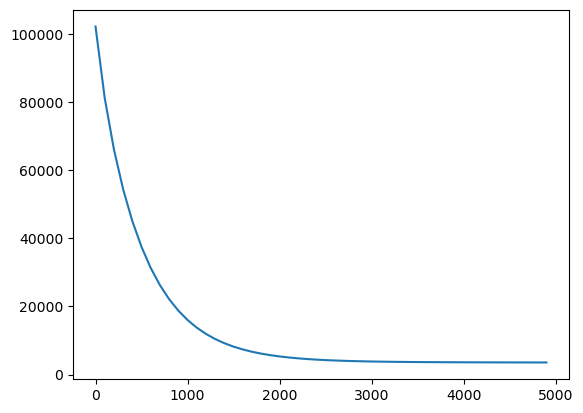

In [7]:
data = load_boston()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)
X_train = preprocessing.scale(X_train)
X_test = preprocessing.scale(X_test)
history = model(X_train, y_train, X_test, y_test)
plt.plot(list(history["costs"].keys()), list(history["costs"].values()))
plt.show()

In [8]:
# Test with normal equation
history = model(X_train, y_train, X_test, y_test, method="normal_equation")

Train f1 score:  0.7675442204753735
Test f1 score:  0.6602643928966083


In [9]:
linearRegression = LinearRegression()
linearRegression.fit(X_train, y_train)
print("Train r2 score: ", r2_score(y_train, linearRegression.predict(X_train)))
print("Test r2 score: ", r2_score(y_test, linearRegression.predict(X_test)))

Train r2 score:  0.7678118436769891
Test r2 score:  0.6584383208160094
